## Chapter 2 사이킷런으로 시작하는 머신러닝

### 1. 사이킷런 소개와 특징

사이킷런(sckit-learn) : 파이썬 머신러닝 라이브러리 중 가장 많이 이용됨

### 2. 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측
### 3. 사이킷런의 기반 프레임워크 익히기

- Estimator 이해 및 fit(), predict() 메서드 <br/> ML 모델 학습을 위해 fit(), predict() 메서드가 제공된다. 사이킷런에서는 분류 알고리즘을 구현한 클래스로 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭한다. 이들을 합쳐 Estimator라고 한다. <br/> 비지도 학습에서도 fit()과 transform()을 적용한다. 비지도 학습에서의 fit()은 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이고 transform()은 fit() 이후에 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업을 수행한다.
- 사이킷런의 주요 모델 <br/> 생략

### 4. Model Selection 모듈 소개

- 학습/테스트 데이터 세트 분리 : train_test_split() <br/>예측을 수행할 데이터 세트는 학습에 이용되지 않은 데이터여야 한다. train_test_split()으로 원본 데이터 세트를 학습/테스트 데이터 세트로 쉽게 분리할 수 있다. <br/>train_test_split() 은 첫 파라미터로 피처 데이터 세트, 두 번째 파라미터로 레이블 데이터 세트를 입력받는다. 선택적 파라미터는 다음과 같다.
    - test_size : 전체 데이터에서 테스트 데이터 크기를 얼마로 할 지 결정한다. 기본 값은 0.25 (최대 1)
    - train_size : 전체 데이터에서 학습 데이터 크기를 얼마로 할 지 결정한다. test_size가 있어 잘 사용하진 않음
    - shuffle : 데이터를 분리하기 전 섞을지 말지를 결정. 디폴트는 True
    - ramdom_state : 같은 결과가 필요할 때 같은 ramdom_state 값을 입력해야 함
    
반환 값은 튜플 형태이다.

In [1]:
# model selection 모듈 
# 학습/테스트 데이터 세트 분리 - train_test_split()

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris_data = load_iris()
df_clf = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


#### 교차 검증
<br/> 알고리즘 학습에는 학습 데이터와 예측 성능 평가를 위한 테스트용 데이터가 필요한데 이 역시 과적합에 취약하다. 이를 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행한다. <br/>교차 검증은 데이터 편중을 막기 위해 학습 데이터 세트를 다시 학습 데이터와 검증 데이터로 나눈다. 그 후 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것이다. <br/>대부분의 ML 모델의 성능 평가는 교차 겁증 기반으로 1차 평가를 한 뒤 테스트 데이터 세트에 적용해 평가하는 프로세스이다.

##### K 폴드 교차 검증 

가장 보편적으로 사용되는 교차 검증 기법이다. k개의 데이터 폴드 세트를 만들어 k번 만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법이다.
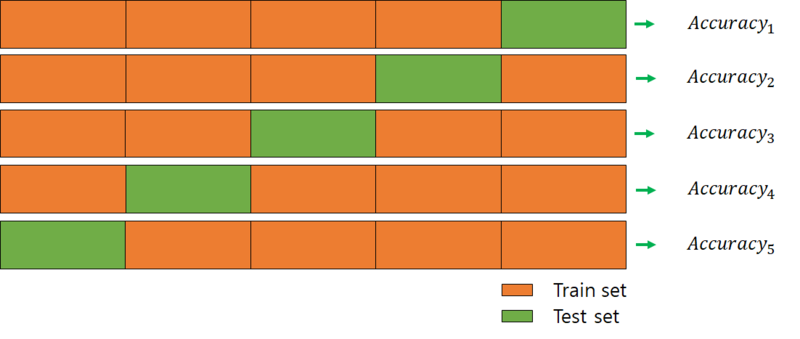

In [2]:
# 교차 검증
# k 폴드 교차 검증

from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붗꽃 데이터 세트 크기', features.shape[0])

붗꽃 데이터 세트 크기 150


In [3]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


##### Stratified K 폴드 
불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식 (ex) 대출 사기 감지 등) <br/> K폴드의 경우 폴드 세트로 나누면서 레이블 균형이 무너질 수 있다. <br/> 사용법은 K폴드와 비슷하지만 레이블 데이터 세트가 필수적으로 필요하다. (K 폴드의 경우 필수적이진 않음)

In [9]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']) :
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

##교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64
##교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64
##교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


In [14]:
features = iris.data
label = iris.target

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label) :
    #split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n 교차 검증별 정확도 : ', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도 : ', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

 교차 검증별 정확도 :  [0.98 0.94 0.98]
## 평균 검증 정확도 :  0.9666666666666667


##### 교차 검증을 보다 간편하게 - cross_val_score() 
사이킷런은 교차 검증을 좀 더편리하게 수행할 수 있게 API를 제공한다. 대표적인 것이 cross_val_score()이다. <br/> 직전 코드처럼 반복문을 쓸 필요가 없어진다. 원형은 다음과 같다.

> cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

이 중 estimator, X, y, scoring, cv가 주요 파라미터이다.
- estimator : Classifier 또는 Regressor를 의미
- X : 피처 데이터 세트
- y : 레이블 데이터 세트
- scoring : 예측 성능 평가 지표
- cv : 교차 검증 폴드 수
- 반환값 : scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환
- classifier가 입력되면 StratifiedKFold, 회귀인 경우 K폴드 방식으로 진행

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도 :  0.9667


#### GridSearchCV - 교차 검증과 하이퍼 파라미터 튜닝을 한 번에

GridSearchCV는 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다.

In [17]:
grid_parameters = {'max_depth' : {1, 2, 3},
                   'min_samples_split' : [2, 3]
                  }

위와 같은 경우 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행한다. ((1, 2), (1, 3), (2, 1) ... (3, 3)) <br/> GridSearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다. 하지만 상대적으로 시간이 오래 걸린다. <br/> 위의 경우 cv가 3회라면 총 18회의 학습/평가가 진행된다. <br/> 주요 파라미터는 다음과 같다.
- estiimator : classifier, regressor, pipeline이 사용될 수 있다.
- param_grid : key + 리스트 값을 가지는 딕셔너리가 주어딘다. estimator 튜닝을 위해 파라미터명과 사용되 ㅍ여러 파라미터 값을 지정한다.
- scoring : 예측 성능을 측정할 평가 방법을 지정한다. 별도의 성능 평가 지표 함수 지정 가능하다.
- cv : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
- refit : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킨다.

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

# 파라미터를 딕셔너리로 저장
parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2, 3]}

# param_grid의 하이퍼 파라미터를 3 개의 train, test set fold로 나누어 테스트 수행 설정
# refit은 True가 디폴트 (가장 좋은 파라미터 설정으로 재학습) 
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [20]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


In [21]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# best_estimator_는 이미 최적 학습이 된 상태, 별도 학습 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도 : 0.9667
